# <u>`HEALTHCARE FRAUD DETECTION ANALYSIS`<u>

# `Project Overview`

The healthcare fraud detection capstone project aims to develop a robust system that leverages advanced machine learning algorithms, such as logistic regression, random forest, and neural networks, along with anomaly detection techniques like clustering, outlier detection, and support vector machines. These algorithms will be applied to integrated healthcare data to accurately identify and flag potential fraudulent activities in healthcare claims. 

The project will involve preprocessing and integrating diverse data sources, extracting relevant features, training the models on historical data with known fraudulent and non-fraudulent instances, and optimizing the system for scalability. The interpretability of results will be emphasized to provide transparent and understandable outputs, facilitating decision-making processes. Ultimately, the project seeks to combat healthcare fraud, minimize financial losses, improve patient care, and enhance the integrity of the healthcare industry.

## `Problem statement`
Healthcare fraud has grown to be a major problem on a global scale, costing both public and private healthcare organizations huge sums of money. Fraudulent practices include billing for treatments that were never provided, receiving kickbacks, and identity theft not only waste money but also jeopardize patient care and public confidence in the healthcare system. For the sake of maintaining fiscal integrity, fair and accurate invoicing, and the caliber of healthcare services, it is crucial to identify and stop healthcare fraud.

## `Business objectives`

**Main objective**

To develop an effective healthcare fraud detection system to identify and prevent fraudulent activities in the healthcare industry.

*Identify Fraudulent Patterns:* The main goal of the analysis of healthcare data is to spot patterns and 1. behaviors of fraud. Investigating the data is necessary to find anomalies, strange patterns, and irregularities that could point to fraudulent activity.

*Provide Actionable Insights:* The goal is to produce warnings and actionable insights that may be used for additional research and intervention. The system should deliver concise and enlightening reports, to help fraud analysts and investigators take the proper measures in response to the identified fraudulent practices.

*Develop a robust system for healthcare fraud detection:* The primary objective of the project is to create a highly effective and reliable system for detecting healthcare fraud that will accurately identify and flag potential instances of fraudulent activities in healthcare claims.

*Facilitate decision-making processes related to fraud detection:* To assist the decision-makers in the healthcare industry with the necessary tools and information to combat fraud effectively in order to identify and investigate potential fraudulent activities.

## `Evaluation of Metrics` 

`Precision` and `recall`:

`F1-score`: 

`AUC score`:

## `Data understanding`

We were able to obtained the dataset from [Kaggle](https://www.kaggle.com/datasets/rohitrox/healthcare-provider-fraud-detection-analysis)

### Introduction to the Dataset
For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider. Lets s see their details :

1. `Inpatient Data:` This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit d diagnosis code.

2. `Outpatient Data:` This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

3. `Beneficiary Details Data:` This data contains beneficiary, know your customer(KYC), details like health conditions,region they belong to etc.

In [139]:
## Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## `Loading Datasets`

In [140]:
##Datasets
provider_data=pd.read_csv('Data/provider_fraud_detection_data.csv')
Beneficiary_data=pd.read_csv('Data/Train_Beneficiarydata-1542865627584.csv')
Inpatient_data= pd.read_csv('Data/Train_Inpatientdata-1542865627584.csv')
Outpatient_data=pd.read_csv('Data/Train_Outpatientdata-1542865627584.csv')

## `Data Preprocessing`

- Check missing values
- Duplicates
- display total number of rows


In [141]:
#creating data_preprocessing function 
def data_preprocessing(data):
    # Check for missing values
    missing_values = data.isnull().sum().sum()
    print("Missing Values:")
    print(missing_values)
    print()

    # Check for duplicates
    duplicates = data.duplicated().sum()
    print("Number of Duplicates:", duplicates)
    print()

    # Display total number of rows
    num_rows = data.shape[0]
    print("Total Number of Rows:", num_rows)
    print()



    # Statistical summary
    print("Statistical Summary:")
    print(data.describe())


### Provider Data

In [142]:
## displaying the data
provider_data.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No



The  `provider_data` dataset consists of provider IDs and a flag indicating potential fraud.

In [143]:
# calling the data processing function
data_preprocessing(provider_data)

Missing Values:
0

Number of Duplicates: 0

Total Number of Rows: 5410

Statistical Summary:
        Provider PotentialFraud
count       5410           5410
unique      5410              2
top     PRV51001             No
freq           1           4904


The `provider_data` dataset has no missing values or duplicates. 

It contains 5,410 unique providers and includes a flag for potential fraud cases.

In [144]:
#displays the count of providers in each fraud category.
x=provider_data.groupby(['PotentialFraud']).count()
x

,Provider
PotentialFraud,
No,4904
Yes,506



The `provider_data` dataset consists of providers categorized as either "No" (not involved in fraud) or "Yes" (potentially involved in fraud). There are 4,904 providers classified as "No" and 506 providers classified as "Yes".

### Out patient data

In [145]:
#displaying the outpatient data
Outpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [146]:
#calling the function
data_preprocessing(Outpatient_data)

Missing Values:
8093719

Number of Duplicates: 0

Total Number of Rows: 517737

Statistical Summary:
       InscClaimAmtReimbursed  ClmProcedureCode_1  ClmProcedureCode_2  \
count           517737.000000          162.000000           36.000000   
mean               286.334799         6116.611111         4503.277778   
std                694.034343         3217.719258         2504.015000   
min                  0.000000           51.000000          412.000000   
25%                 40.000000         3893.000000         2724.000000   
50%                 80.000000         5244.500000         4019.000000   
75%                200.000000         9421.500000         5849.000000   
max             102500.000000         9999.000000         9982.000000   

       ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
count            4.000000            2.000000                 0.0   
mean          2959.000000         4075.500000                 NaN   
std           1863.455393         

*Missing Values:* There are 8,093,719 missing values in the dataset.

*Number of Duplicates:* There are no duplicate rows in the dataset.

*Total Number of Rows:* The dataset contains 517,737 rows.

*Statistical Summary:* The summary shows the mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values for numeric columns.

In [147]:
#Generating column information summary
Outpatient_data_info = pd.DataFrame(data=Outpatient_data.columns, columns=['Column Name'])
Outpatient_data_info['Data Type'] = Outpatient_data.dtypes.values
Outpatient_data_info['No. of Unique Values'] = Outpatient_data.nunique().values
Outpatient_data_info['Count of Missing Values'] = Outpatient_data.isna().sum().values
Outpatient_data_info['Percent of Missing Values'] = (round(Outpatient_data.isna().sum() / len(Outpatient_data) * 100)).values


In [148]:
Outpatient_data_info.head()

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,133980,0,0.0
1,ClaimID,object,517737,0,0.0
2,ClaimStartDt,object,385,0,0.0
3,ClaimEndDt,object,366,0,0.0
4,Provider,object,5012,0,0.0


### In Patient data

In [149]:
# displaying the inpatient data
Inpatient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


`feature engineering`

#### Change the dates of admission and discharge to datetime, and get the number of admission days

In [150]:
#adding a column for days admitted
Inpatient_data['AdmissionDt'] = pd.to_datetime(Inpatient_data['AdmissionDt'] , format = '%Y-%m-%d')
Inpatient_data['DischargeDt'] = pd.to_datetime(Inpatient_data['DischargeDt'],format = '%Y-%m-%d')
Inpatient_data['AdmitDays'] = ((Inpatient_data['DischargeDt'] - Inpatient_data['AdmissionDt']).dt.days)+1

In [151]:
#checking for minimum and maximum days of admission
print('Min AdmitForDays Train:- ',Inpatient_data.AdmitDays.min())
print('Max AdmitForDays Train:- ',Inpatient_data.AdmitDays.max())

Min AdmitForDays Train:-  1
Max AdmitForDays Train:-  36


In [152]:
# calling the function
data_preprocessing(Inpatient_data)

Missing Values:
344003

Number of Duplicates: 0

Total Number of Rows: 40474

Statistical Summary:
       InscClaimAmtReimbursed  DeductibleAmtPaid  ClmProcedureCode_1  \
count            40474.000000            39575.0        23148.000000   
mean             10087.884074             1068.0         5894.611759   
std              10303.099402                0.0         3049.304400   
min                  0.000000             1068.0           11.000000   
25%               4000.000000             1068.0         3848.000000   
50%               7000.000000             1068.0         5369.000000   
75%              12000.000000             1068.0         8666.250000   
max             125000.000000             1068.0         9999.000000   

       ClmProcedureCode_2  ClmProcedureCode_3  ClmProcedureCode_4  \
count         5454.000000          965.000000          116.000000   
mean          4103.738174         4226.355440         4070.172414   
std           2028.182156         2282.761581

In [153]:
#Generating column information summary
Inpatient_data_info = pd.DataFrame(data=Inpatient_data.columns, columns=['Column Name'])
Inpatient_data_info['Data Type'] = Inpatient_data.dtypes.values
Inpatient_data_info['No. of Unique Values'] = Inpatient_data.nunique().values
Inpatient_data_info['Count of Missing Values'] = Inpatient_data.isna().sum().values
Inpatient_data_info['Percent of Missing Values'] = (round(Inpatient_data.isna().sum() / len(Inpatient_data) * 100)).values


In [154]:
Inpatient_data_info

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,31289,0,0.0
1,ClaimID,object,40474,0,0.0
2,ClaimStartDt,object,398,0,0.0
3,ClaimEndDt,object,365,0,0.0
4,Provider,object,2092,0,0.0
5,InscClaimAmtReimbursed,int64,146,0,0.0
6,AttendingPhysician,object,11604,112,0.0
7,OperatingPhysician,object,8287,16644,41.0
8,OtherPhysician,object,2877,35784,88.0
9,AdmissionDt,datetime64[ns],398,0,0.0


### Beneficiary Data

In [155]:
# displaying the dataset
Beneficiary_data.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [156]:
# replacing chronic heart condition, 2 with 0(no chronic condition and 1(yes chronic condition))
Beneficiary_data = Beneficiary_data.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 'ChronicCond_KidneyDisease': 2,
                           'ChronicCond_Cancer': 2, 'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                           'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 'ChronicCond_Osteoporasis': 2, 
                           'ChronicCond_rheumatoidarthritis': 2, 'ChronicCond_stroke': 2 }, 0)
Beneficiary_data = Beneficiary_data.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [157]:
# Check for the number of records in the 'DOD'-Date of Death-column
Beneficiary_data['DOD'].isna().value_counts()

True     137135
False      1421
Name: DOD, dtype: int64

`feature engineering`

In [158]:
#adding age column with ages of clients
Beneficiary_data['DOB'] = pd.to_datetime(Beneficiary_data['DOB'] , format = '%Y-%m-%d')
Beneficiary_data['DOD'] = pd.to_datetime(Beneficiary_data['DOD'],format = '%Y-%m-%d',errors='ignore')
Beneficiary_data['Age'] = round(((Beneficiary_data['DOD'] - Beneficiary_data['DOB']).dt.days)/365)

As we see that last DOD value is 2009-12-01 ,which means Beneficiary Details data is of year 2009.
so we will calculate age of other beneficiaries for year 2009.


In [159]:
# calculating age of other beneficiaries 
Beneficiary_data.Age.fillna(round(((pd.to_datetime('2009-12-01' , format = '%Y-%m-%d') - Beneficiary_data['DOB']).dt.days)/365),
                                 inplace=True)

In [160]:
# Add a 'WhetherDead' column to the beneficiary data
Beneficiary_data.loc[Beneficiary_data.DOD.isna(),'WhetherDead']=0
Beneficiary_data.loc[Beneficiary_data.DOD.notna(),'WhetherDead']=1
Beneficiary_data.loc[:,'WhetherDead'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: WhetherDead, dtype: float64

In [161]:
# calling the function
data_preprocessing(Beneficiary_data)

Missing Values:
137135

Number of Duplicates: 0

Total Number of Rows: 138556

Statistical Summary:
              Gender           Race          State         County  \
count  138556.000000  138556.000000  138556.000000  138556.000000   
mean        1.570932       1.254511      25.666734     374.424745   
std         0.494945       0.717007      15.223443     266.277581   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000       1.000000      11.000000     141.000000   
50%         2.000000       1.000000      25.000000     340.000000   
75%         2.000000       1.000000      39.000000     570.000000   
max         2.000000       5.000000      54.000000     999.000000   

       NoOfMonths_PartACov  NoOfMonths_PartBCov  ChronicCond_Alzheimer  \
count        138556.000000        138556.000000          138556.000000   
mean             11.907727            11.910145               0.332183   
std               1.032332             0.936893         

In [162]:
# Generating column information summary
Beneficiary_data_info = pd.DataFrame(data=Beneficiary_data.columns, columns=['Column Name'])
Beneficiary_data_info['Data Type'] = Beneficiary_data.dtypes.values
Beneficiary_data_info['No. of Unique Values'] = Beneficiary_data.nunique().values
Beneficiary_data_info['Count of Missing Values'] = Beneficiary_data.isna().sum().values
Beneficiary_data_info['Percent of Missing Values'] = (round(Beneficiary_data.isna().sum() / len(Beneficiary_data) * 100)).values

In [163]:
Beneficiary_data_info

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,138556,0,0.0
1,DOB,datetime64[ns],900,0,0.0
2,DOD,datetime64[ns],11,137135,99.0
3,Gender,int64,2,0,0.0
4,Race,int64,4,0,0.0
5,RenalDiseaseIndicator,object,2,0,0.0
6,State,int64,52,0,0.0
7,County,int64,314,0,0.0
8,NoOfMonths_PartACov,int64,13,0,0.0
9,NoOfMonths_PartBCov,int64,13,0,0.0


#### `Checking for common columns in outpatients and inpatient dataset`

In [164]:
# checking for common cols in the outpatient, inpatient datasets
col_outpatient=[]
for o in Outpatient_data.columns:
    if o in Inpatient_data.columns:
        col_outpatient.append(o)

#Checking each of the columns in the Inpatient dataset if they are present in the Outpatient dataset
col_inpatient=[]
for i in Inpatient_data.columns:
    if i in Outpatient_data.columns:
        col_inpatient.append(i)
print("Cols of Outpatient dataset also present in Inpatient dataset",len(col_outpatient))
print("Cols of Inpatient dataset also present in Outpatient dataset",len(col_inpatient))

#Checking for common column names in the outpatient and the inpatient datasets 
common_cols= set(col_outpatient).intersection(set(col_inpatient))
common_cols= list(common_cols)
print("Common columns between the outpatient and the inpatient datasets",len(common_cols))

Cols of Outpatient dataset also present in Inpatient dataset 27
Cols of Inpatient dataset also present in Outpatient dataset 27
Common columns between the outpatient and the inpatient datasets 27


In [165]:
#displaying the cols
common_cols

['ClmProcedureCode_6',
 'ClmProcedureCode_2',
 'ClmProcedureCode_4',
 'ClmDiagnosisCode_9',
 'OperatingPhysician',
 'DeductibleAmtPaid',
 'ClaimEndDt',
 'ClmDiagnosisCode_3',
 'AttendingPhysician',
 'ClmDiagnosisCode_4',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_6',
 'OtherPhysician',
 'ClmDiagnosisCode_2',
 'ClmProcedureCode_3',
 'ClaimStartDt',
 'BeneID',
 'ClmDiagnosisCode_5',
 'ClmDiagnosisCode_1',
 'ClaimID',
 'ClmProcedureCode_1',
 'ClmProcedureCode_5',
 'ClmAdmitDiagnosisCode',
 'Provider',
 'InscClaimAmtReimbursed',
 'ClmDiagnosisCode_10',
 'ClmDiagnosisCode_8']

#### Merging the Outpatient and the Inpatient datasets based on the common columns

In [166]:
patient_data = pd.merge(Outpatient_data,Inpatient_data,left_on=common_cols,right_on=common_cols,how='outer')
patient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitDays
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,0.0,56409,NaT,NaT,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,0.0,79380,NaT,NaT,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,0.0,71947,NaT,NaT,NaN,NaN


In [167]:
# displaying the merged datasets 
patient_data.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,AdmissionDt,DischargeDt,DiagnosisGroupCode,AdmitDays
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,0.0,56409,NaT,NaT,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,0.0,79380,NaT,NaT,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,0.0,NaN,NaT,NaT,NaN,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,0.0,71947,NaT,NaT,NaN,NaN


#### Merging the resultant dataset with Beneficiary data on the BeneID column in both datasets

In [168]:
# Merge patientdata with beneficiary data
all_patient = pd.merge(patient_data,Beneficiary_data,
                            left_on='BeneID',right_on='BeneID',how='outer')
print('Shape:', all_patient.shape)
all_patient.head()

Shape: (558211, 57)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,0,0,0,0,0,30,50,73.0,0.0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,1,0,0,0,0,0,90,40,73.0,0.0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,1,0,0,0,0,0,90,40,73.0,0.0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,0,0,0,1810,760,87.0,0.0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,0,0,0,1810,760,87.0,0.0


#### Merging the provider with the final dataset

In [169]:
# Merge the final dataset with the provider
final_df = pd.merge(all_patient,provider_data,left_on= 'Provider',right_on='Provider',how='outer')
print('Shape:', final_df.shape)
final_df.head()

Shape: (558211, 58)


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,0,0,0,0,30,50,73.0,0.0,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,0,0,0,1810,760,87.0,0.0,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,0,0,0,1810,760,87.0,0.0,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,0,0,0,1810,760,87.0,0.0,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,0,0,0,1810,760,87.0,0.0,Yes


In [170]:
final_df.duplicated().sum()

0

In [171]:
final_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'AdmissionDt', 'DischargeDt',
       'DiagnosisGroupCode', 'AdmitDays', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression'

`feature engineering`

In [172]:
# Adding a feature inp_out signifying whether the patient was inpatient or outpatient
inp_out = final_df.AdmitDays.isnull()
inp_data = inp_out.map({True:1,False:0})
final_df['inp_out'] = inp_data

In [173]:
# Handling nan values generated due to merging inpatient and outpatient
final_df.AdmitDays.fillna(0,inplace=True)

In [174]:
# Since no date is given in the problem statement we are taking last death as the latest day
last_death = max(final_df['DOD'][final_df['DOD'].notnull()])

In [175]:
# Feature: Total_deductible and Total_reimbursible
final_df['Total_deductible'] = final_df['OPAnnualDeductibleAmt']+final_df['IPAnnualDeductibleAmt']
final_df['Total_reimbursible'] = final_df['OPAnnualReimbursementAmt']+final_df['IPAnnualReimbursementAmt']

In [176]:
# Feature : settlement_days
final_df['ClaimStartDt']=pd.to_datetime(final_df.ClaimStartDt,format='%Y-%m-%d')
final_df['ClaimEndDt']=pd.to_datetime(final_df.ClaimEndDt,format='%Y-%m-%d')
final_df['settlement_days']=final_df['ClaimEndDt']-final_df['ClaimStartDt']
final_df['settlement_days']=final_df['settlement_days'].dt.days

In [177]:
# Displaying the general information of final_df
final_df_info = pd.DataFrame(data=final_df.columns, columns=['Column Name'])
final_df_info['Data Type'] = final_df.dtypes.values
final_df_info['No. of Unique Values'] = final_df.nunique().values
final_df_info['Count of Missing Values'] = final_df.isna().sum().values
final_df_info['Percent of Missing Values'] = (round(final_df.isna().sum() / len(final_df) * 100)).values

In [178]:
final_df_info.head()

,Column Name,Data Type,No. of Unique Values,Count of Missing Values,Percent of Missing Values
0,BeneID,object,138556,0,0.0
1,ClaimID,object,558211,0,0.0
2,ClaimStartDt,datetime64[ns],398,0,0.0
3,ClaimEndDt,datetime64[ns],366,0,0.0
4,Provider,object,5410,0,0.0


In [179]:
final_df.duplicated().sum()

0

### `Handling Missing Values`

In [180]:
# Drop irrelevant features
num_claims=final_df.groupby('Provider')['ClaimID'].nunique()
final_df.drop(['BeneID','DOB','DOD','ClaimID','ClaimStartDt','ClaimEndDt','AdmissionDt','DischargeDt', 'Race'],axis=1,inplace=True)

In [181]:
# Filling with zeros representing out patient since they are not usually admitted
final_df['AdmitDays'].fillna(0,inplace=True)

In [182]:
# Apply the general data information function to check on the missing values
data_preprocessing(final_df)

Missing Values:
8955459

Number of Duplicates: 4

Total Number of Rows: 558211

Statistical Summary:
       InscClaimAmtReimbursed  ClmProcedureCode_1  ClmProcedureCode_2  \
count           558211.000000        23310.000000         5490.000000   
mean               997.012133         5896.154612         4106.358106   
std               3821.534891         3050.489933         2031.640878   
min                  0.000000           11.000000           42.000000   
25%                 40.000000         3848.000000         2724.000000   
50%                 80.000000         5363.000000         4019.000000   
75%                300.000000         8669.000000         4439.000000   
max             125000.000000         9999.000000         9999.000000   

       ClmProcedureCode_3  ClmProcedureCode_4  ClmProcedureCode_5  \
count          969.000000          118.000000            9.000000   
mean          4221.123839         4070.262712         5269.444444   
std           2281.849885         

In [183]:
# Final df with the relevant columns
print('Shape:', final_df.shape)

final_df.columns

Shape: (558211, 53)


Index(['Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
       'AdmitDays', 'Gender', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumat

In [184]:
#checkig fr percentage of missing values per feature
print('Percent missing values in final fataframe :\n')
final_df.isnull().sum()*100/len(final_df)

Percent missing values in final fataframe :



Provider                             0.000000
InscClaimAmtReimbursed               0.000000
AttendingPhysician                   0.270149
OperatingPhysician                  79.497538
OtherPhysician                      64.218548
ClmDiagnosisCode_1                   1.872589
ClmDiagnosisCode_2                  35.041588
ClmDiagnosisCode_3                  56.458221
ClmDiagnosisCode_4                  70.524407
ClmDiagnosisCode_5                  79.949517
ClmDiagnosisCode_6                  84.881702
ClmDiagnosisCode_7                  88.144805
ClmDiagnosisCode_8                  90.425843
ClmDiagnosisCode_9                  92.509105
ClmDiagnosisCode_10                 99.102490
ClmProcedureCode_1                  95.824160
ClmProcedureCode_2                  99.016501
ClmProcedureCode_3                  99.826410
ClmProcedureCode_4                  99.978861
ClmProcedureCode_5                  99.998388
ClmProcedureCode_6                 100.000000
DeductibleAmtPaid                 

### `Handling Outliers`

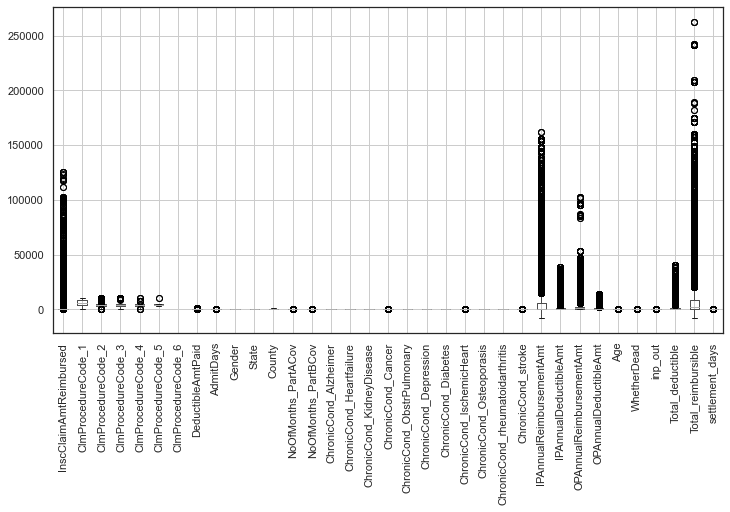

In [185]:
# Box plot to check for the outliers
plt.figure(figsize=(12,6))
final_df.boxplot()
plt.xticks(rotation=90)
plt.show()

`Handling outliers in amounts disbursed`

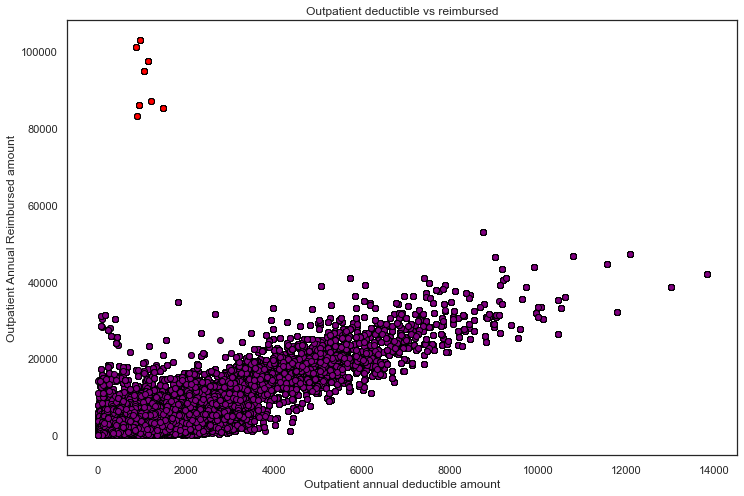

In [186]:
fig = plt.figure()
ax = fig.add_subplot(111)

# plot points inside distribution's width
ax.scatter(final_df['OPAnnualDeductibleAmt'], final_df['OPAnnualReimbursementAmt'],
           edgecolors='black', color="purple")  # Modified color for points within the distribution's width

ax.scatter(final_df['OPAnnualDeductibleAmt'][final_df['OPAnnualReimbursementAmt'] > 80000],
           final_df['OPAnnualReimbursementAmt'][final_df['OPAnnualReimbursementAmt'] > 80000],
           edgecolors='black', color="red")  # Modified color for points above 80000 in reimbursement

ax.set_xlabel('Outpatient annual deductible amount')
ax.set_ylabel('Outpatient Annual Reimbursed amount')
ax.set_title('Outpatient deductible vs reimbursed')

plt.show()

* ` We can spot outliers of above 80,000 so we drop them, for normalization, and patterrn recognition purposes. Outliers can distort the patterns severely`

In [187]:
# Dropping the outliers observed above
final_df.drop(final_df[final_df['OPAnnualReimbursementAmt']>80000].index,inplace=True)

Although some features in the dataset may have outliers, it was determined that these outliers convey important information about the data. As a result, the decision was made to retain the outliers and not remove them. The outliers in these features provide valuable insights and contribute to a comprehensive understanding of the data, outweighing the potential drawbacks they may introduce. By leaving the outliers intact, the analysis and modeling process can capture the full range of patterns and behaviors present in the data, including rare or unusual occurrences that may be relevant to fraud detection in healthcare providers.

## `Exploratory Data Analysis(EDA)`

In [188]:
import random

def bar_plot(x, y, xlab=None, ylab=None, title=None, annotate=False):
  '''This function generates an annotated barplot'''
  fig,ax = plt.subplots(figsize=(8,6))
  custom_palette = ['dark:salmon_r','ocean','inferno','BrBG','binary','winter']
  choice = random.choice(custom_palette)

  if title is not None:
    ax.set_title(title)
  else:
    ax.set_title('No title')  

  sns.barplot(x=x,
            y=y,palette=choice,alpha=0.8,edgecolor='black',linewidth=2)
  ax.patch.set_edgecolor('black')  
  ax.patch.set_linewidth(2)
  plt.xlabel(xlab)
  plt.ylabel(ylab)

  if annotate == True:
    for p in ax.patches:
      ax.annotate(p.get_height(), (p.get_x()+p.get_width()/3. * 1.005, p.get_height() * .5))
      
  plt.show()    

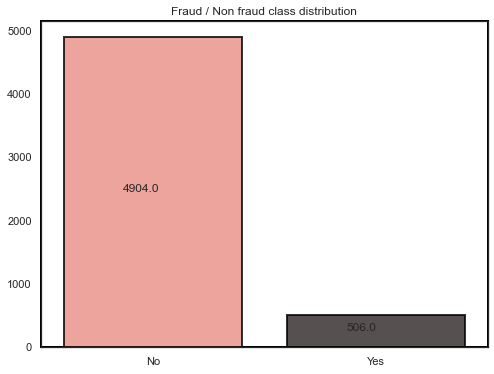

Only 9.35% of healthcare providers are fraudulent 


In [189]:
# Apply the bar_plot function on the final_df
bar_plot(provider_data.PotentialFraud.value_counts().index,
        provider_data.PotentialFraud.value_counts().values,
        title='Fraud / Non fraud class distribution',
        annotate=True)
plt.show()
print('Only {0:.2f}% of healthcare providers are fraudulent '.format(provider_data.PotentialFraud.value_counts()[1]/5410*100))

* `There very high class imbalance in our data.`

#### Identifying top 10 Insurance Providers

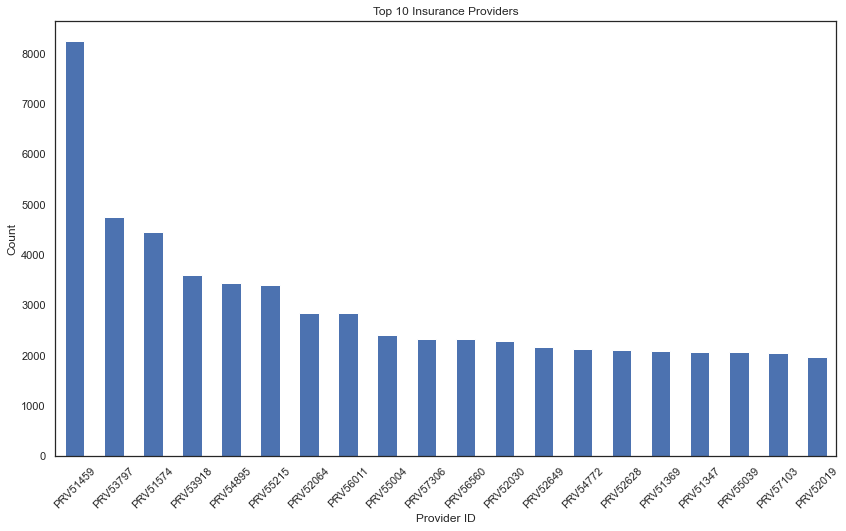

In [190]:
count = final_df['Provider'].value_counts()[:20]
plt.figure(figsize=(14, 8))
count.plot(kind='bar')

# Set the plot title and labels
plt.title('Top 10 Insurance Providers')
plt.xlabel('Provider ID')
plt.ylabel('Count')
# Set xticks rotation=45
plt.xticks(rotation=45)

# Display the plot
plt.show();

* `The plot above shows the count of occurrences for the top 10 insurance providers. It provides a visual representation of the distribution and allows easy identification of the most frequently appearing providers in the dataset.` 

#### Plotting the distribution of the least 20 popular providers based on potential fraud

Text(0.5, 1.0, 'Distribution of Least 20 Popular Providers')

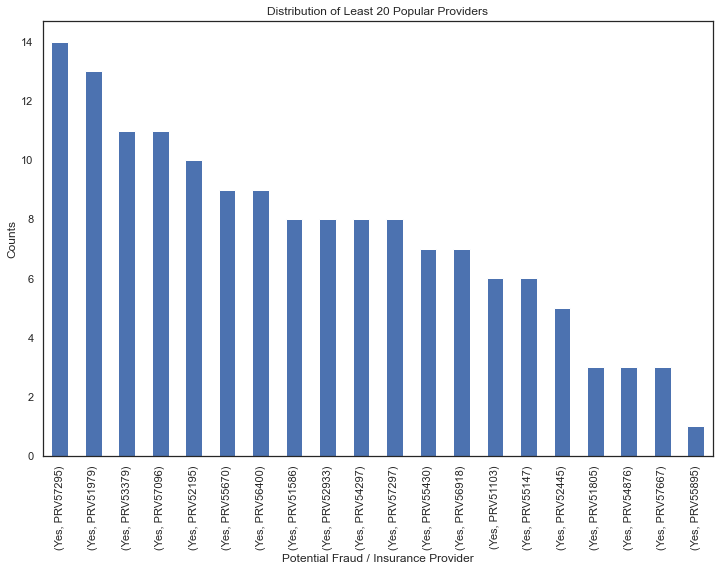

In [191]:
final_df.groupby('PotentialFraud')['Provider'].value_counts(ascending=False)[5390:].plot(kind='bar');
plt.xlabel('Potential Fraud / Insurance Provider')
plt.ylabel('Counts')
plt.title('Distribution of Least 20 Popular Providers')

Distribution of potential fraud cases among the least popular insurance providers. It displays the count of occurrences for each combination of "Potential Fraud" and "Insurance Provider" categories.

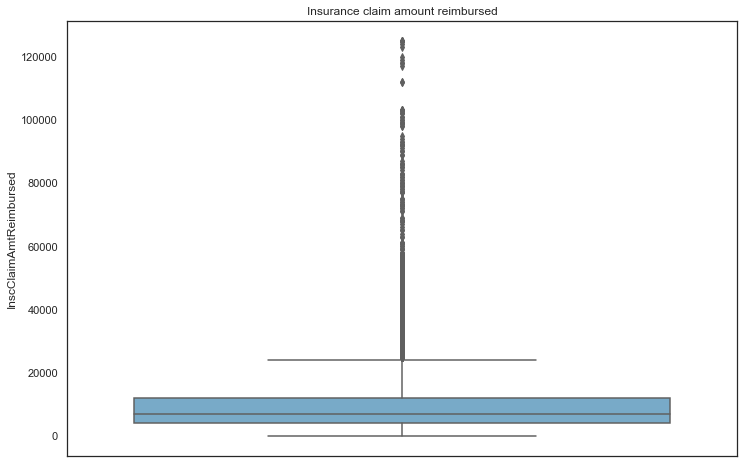

In [192]:
#Insurance claim reimbursed
plt.title('Insurance claim amount reimbursed')
sns.boxplot(y=Inpatient_data.InscClaimAmtReimbursed, palette='Blues')
plt.show()

* `The box plot above helps us spot outliers. Most patients seem to have less claim amounts while others have very huge claim amounts in the inpatient data`

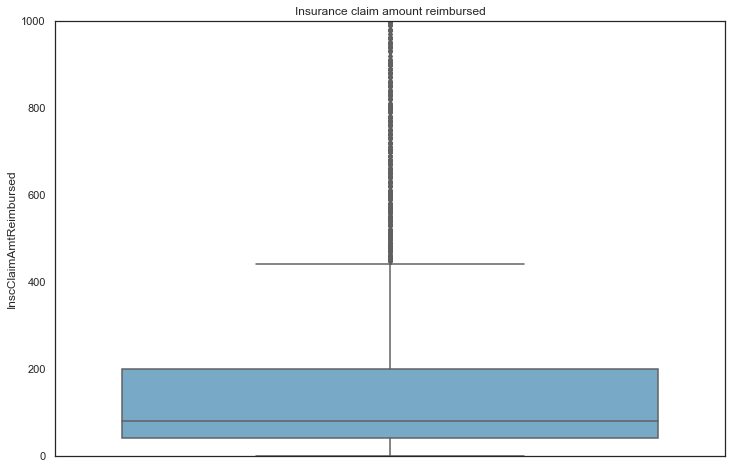

In [193]:
# outpatient data

#Outpatient InsclaimReimb
plt.title('Insurance claim amount reimbursed')
sns.boxplot(y=Outpatient_data.InscClaimAmtReimbursed, palette='Blues')
plt.ylim(0,1000)
plt.show()

* `The outliers seem to be very separated from frequently occuring data.`
* `Most outpatients seem to have claims under 400`

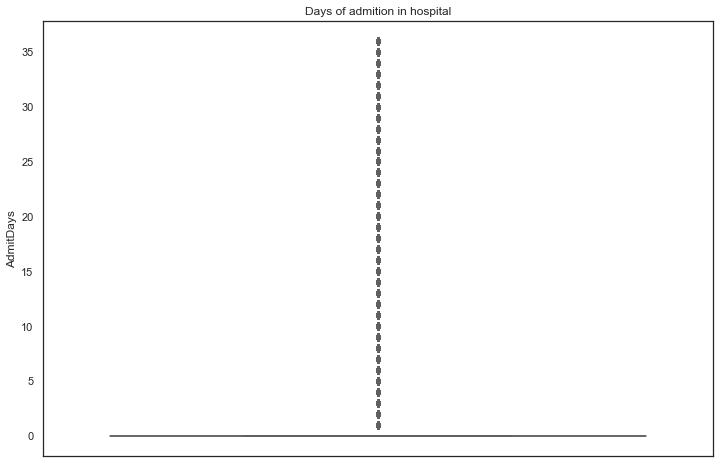

In [194]:
# Analysis of days of admission
plt.title('Days of admition in hospital')
sns.boxplot(y=final_df.AdmitDays, palette='Blues')
plt.show()

* `Most people were discharged in 15 days time.`

#### Gender Distribution among Insurance Beneficiaries

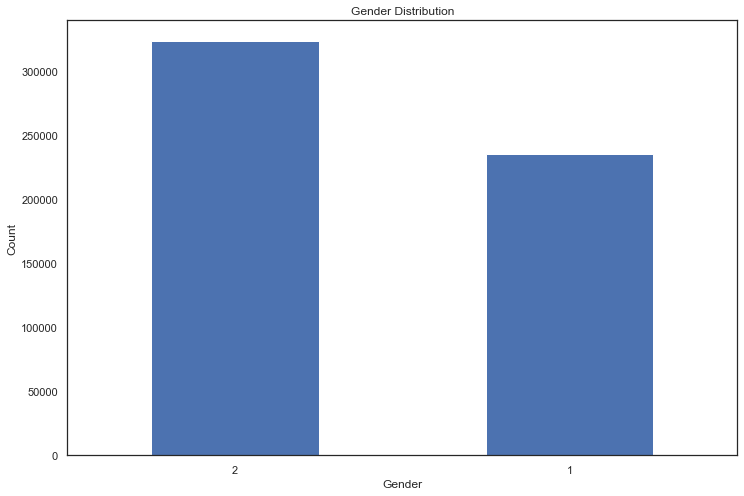

In [195]:
# Check the distribution of insurance beneficiaries by gender
count = final_df['Gender'].value_counts()
count.plot(kind='bar')

# Set the plot title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.xticks(rotation=360)
# Display the plot
plt.show()

The majority of insurance beneficiaries are Female, as indicated by the higher count in the Female category compared to the Male category.

#### Distribution of Potential Fraud in Merged Claim Transactions

Percent Distribution of Potential Fraud class:- 
 No     61.879782
Yes    38.120218
Name: PotentialFraud, dtype: float64


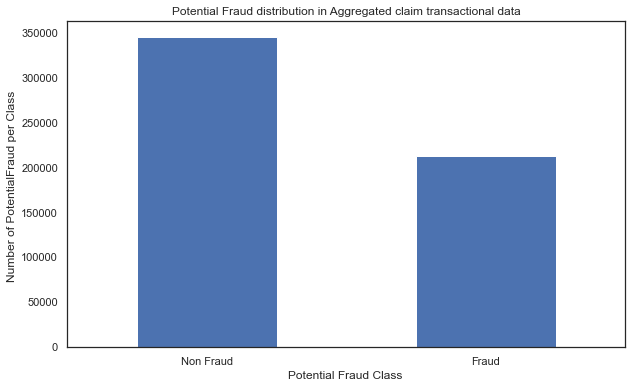

In [196]:
#PLotting the frequencies of fraud and non-fraud Merged transactions in the data

sns.set_style('white',rc={'figure.figsize':(12,8)})
count_classes = pd.value_counts(final_df['PotentialFraud'], sort = True)
print("Percent Distribution of Potential Fraud class:- \n",count_classes*100/len(final_df))
LABELS = ["Non Fraud", "Fraud"]
#Drawing a barplot
count_classes.plot(kind = 'bar', rot=0,figsize=(10,6))

#Giving titles and labels to the plot
plt.title("Potential Fraud distribution in Aggregated claim transactional data")
plt.xticks(range(2), LABELS)
plt.xlabel("Potential Fraud Class ")
plt.ylabel("Number of PotentialFraud per Class ")

plt.savefig('PotentialFraudDistributionInMergedData')

* `This clearly shows presense of fraudulent activiites. There is also a strong relationship between fraudulent activities and amount of money disbursed.`


#### State-wise Distribution of Beneficiaries Percentage

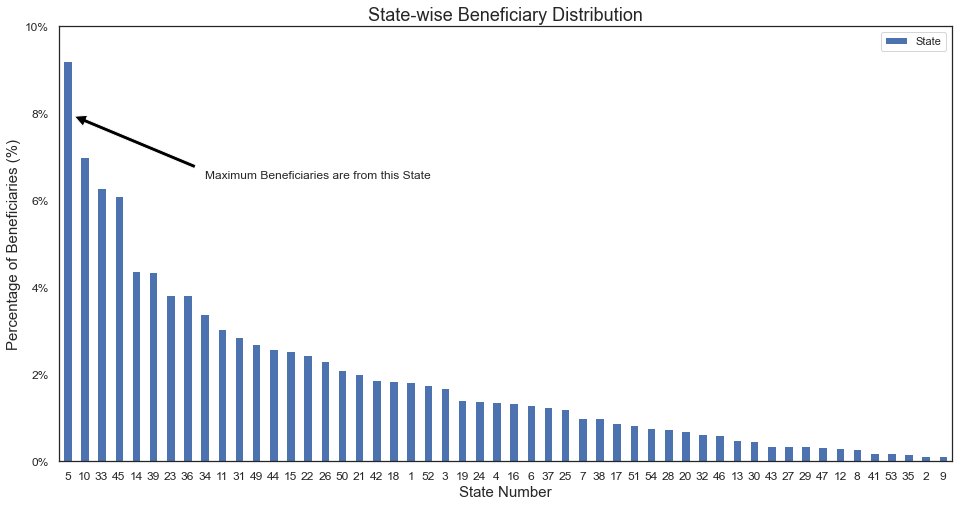

<Figure size 864x576 with 0 Axes>

In [197]:
count_States = pd.value_counts(final_df['State'], sort=True)

# Drawing a barplot
(count_States * 100 / len(final_df)).plot(kind='bar', rot=0, figsize=(16, 8), fontsize=12, legend=True)

# Giving titles and labels to the plot
plt.annotate('Maximum Beneficiaries are from this State', xy=(0.01, 8), xytext=(8, 6.5),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.yticks(np.arange(0, 12, 2), ('0%', '2%', '4%', '6%', '8%', '10%'))
plt.title("State-wise Beneficiary Distribution", fontsize=18)
plt.xlabel("State Number", fontsize=15)
plt.ylabel("Percentage of Beneficiaries (%)", fontsize=15)
plt.show()

plt.savefig('StateWiseBeneficiaryDistribution')


The majority of beneficiaries are from a few specific states, while others have a relatively lower percentage of beneficiaries.

#### Distribution of Top-10 Procedures in Healthcare Fraud Cases

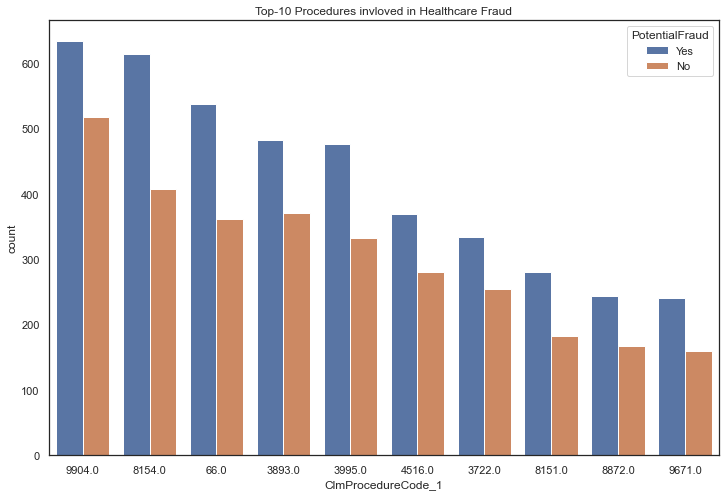

<Figure size 864x576 with 0 Axes>

In [198]:
## Lets plot countplot for each fraud non fraud categories

sns.set(rc={'figure.figsize':(12,8)},style='white')

ax=sns.countplot(x='ClmProcedureCode_1',hue='PotentialFraud',data=final_df
              ,order=final_df.ClmProcedureCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Procedures invloved in Healthcare Fraud')
    
plt.show()

plt.savefig('TopProceduresinvlovedinHealthcareFraud')

Identifys specific procedures that require closer scrutiny and investigation for potential fraud detection.

#### Distribution of Top-10 Diagnoses Involved in Healthcare Fraud

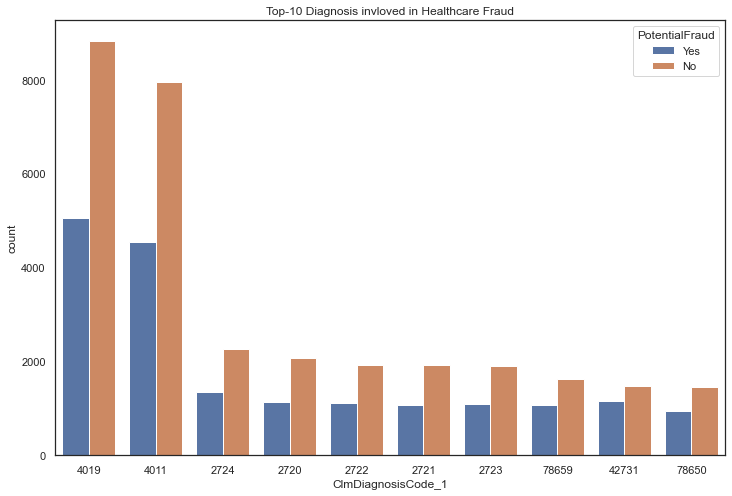

<Figure size 864x576 with 0 Axes>

In [199]:
## lets plot Top-10 Claim Diagnosis  invloved in Healthcare Fraud

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.countplot(x='ClmDiagnosisCode_1',hue='PotentialFraud',data=final_df
              ,order=final_df.ClmDiagnosisCode_1.value_counts().iloc[:10].index)

plt.title('Top-10 Diagnosis invloved in Healthcare Fraud')
plt.show()

plt.savefig('TopDiagnosisInnvlovedinHealthcareFraud')

Certain diagnosis codes have a higher frequency in potential fraud cases compared to non-fraud cases. These diagnosis codes may be indicative of fraudulent activities in healthcare claims.

#### Relationship between IPAnnualDeductibleAmt and IPAnnualReimbursementAmt for Fraud and Non-Fraud Categories

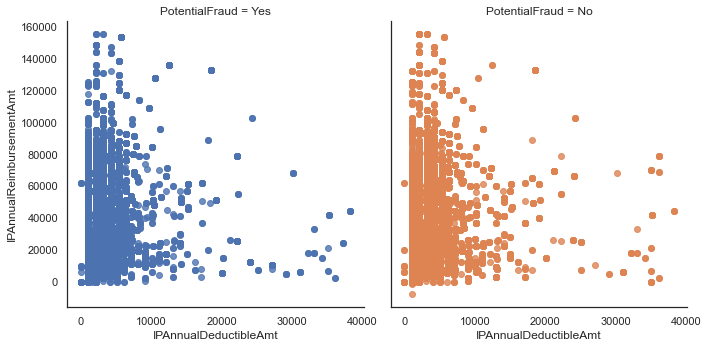

In [200]:
## Lets Plot IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories

sns.set(rc={'figure.figsize':(12,8)},style='white')

sns.lmplot(x='IPAnnualDeductibleAmt',y='IPAnnualReimbursementAmt',hue='PotentialFraud',
           col='PotentialFraud',fit_reg=False,data=final_df)


#plt.title('IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non Fraud Categoories')

plt.savefig('IPAnnualDeductibleAmtandIPAnnualReimbursementAmtinbothfraudandnonFraud')


 There seems to be a positive correlation between the two variables, suggesting that higher deductible amounts are associated with higher reimbursement amounts.

#### Distribution of Potential Fraud Cases for Individuals with Date of Death Information"

Text(0.5, 1.0, 'Distribution of potential fraud for the deceased')

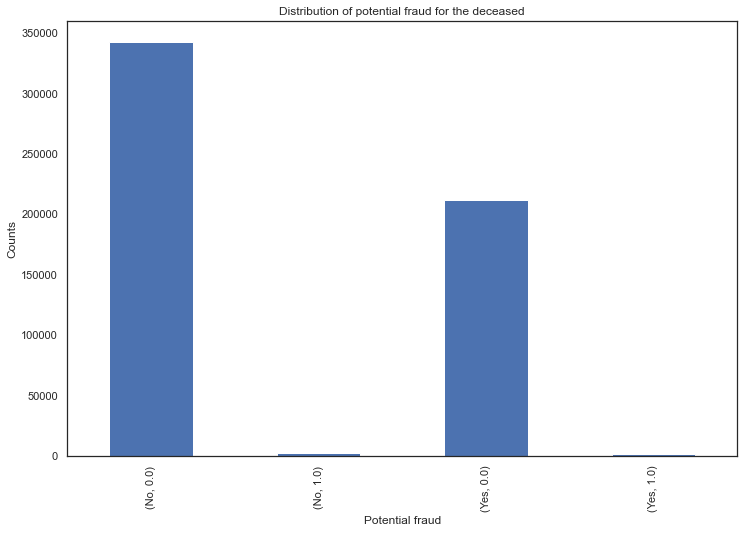

In [201]:
final_df.groupby('PotentialFraud')['WhetherDead'].value_counts().plot(kind='bar');
plt.xlabel("Potential fraud")
plt.ylabel("Counts")
plt.title("Distribution of potential fraud for the deceased")

There seems to be quite a number of fraudulent activities through members already deceased

### `Multivariate Analysis`

#### Numerical vs PotentialFraud Variables".

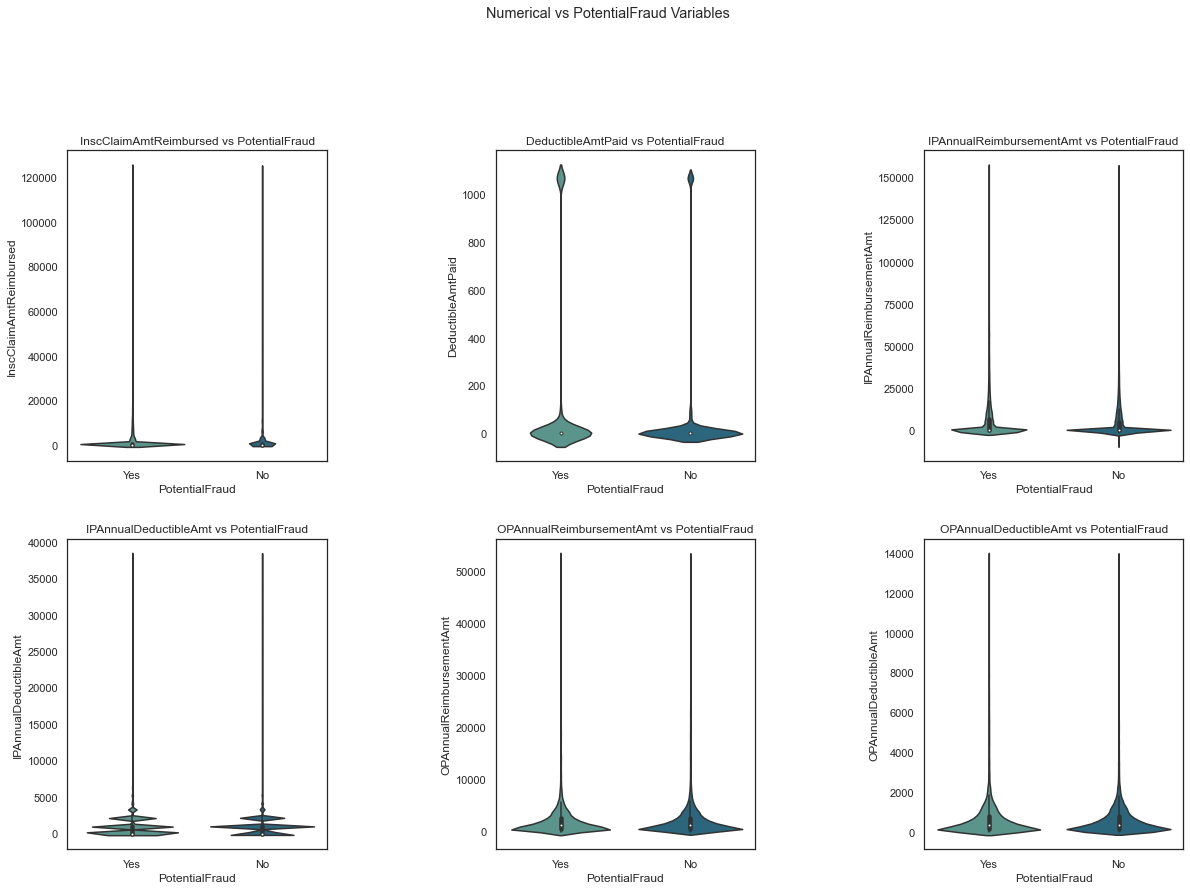

In [202]:
from matplotlib.gridspec import GridSpec

num_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']

fig = plt.figure(figsize=(20, 20))
gs = GridSpec(3, 3, figure=fig)
fig.suptitle('Numerical vs PotentialFraud Variables')

ax = []

for i in range(3):
    for j in range(3):
        if i * 3 + j < len(num_cols):
            ax.append(fig.add_subplot(gs[i, j]))

for k in range(len(ax)):
    sns.violinplot(ax=ax[k], x='PotentialFraud', y=num_cols[k], data=final_df, palette='crest')
    ax[k].set_title('{} vs PotentialFraud'.format(num_cols[k]))

plt.subplots_adjust(wspace=0.65, hspace=0.25)

# Remove unused subplots
if len(ax) > 7:
    for i in range(7, len(ax)):
        fig.delaxes(ax[i])

plt.show()

` observations`
- The variables 'InscClaimAmtReimbursed', 'IPAnnualReimbursementAmt','OPAnnualReimbursementAmt' are very dense around 0 and tapers off towards the tails which means that there fewer observations with increasing values of the variables

- IPAnnualDeductibleAmt variable goes through various densisties with increasing value of the amount, this could be because the deductible amount is fixed and subscribed by the customer hence the grouping is happening at different levels of values of the Deductible Amount variable.

- No inference can be drawn in terms of tagging an observation as Fraud and Non-Fraud just by looking at the distribution of the Age varible as the distribution of the Age variable is identical for both the classes of PotentialFraud

#### Categorical Variables vs PotentialFraud Variables

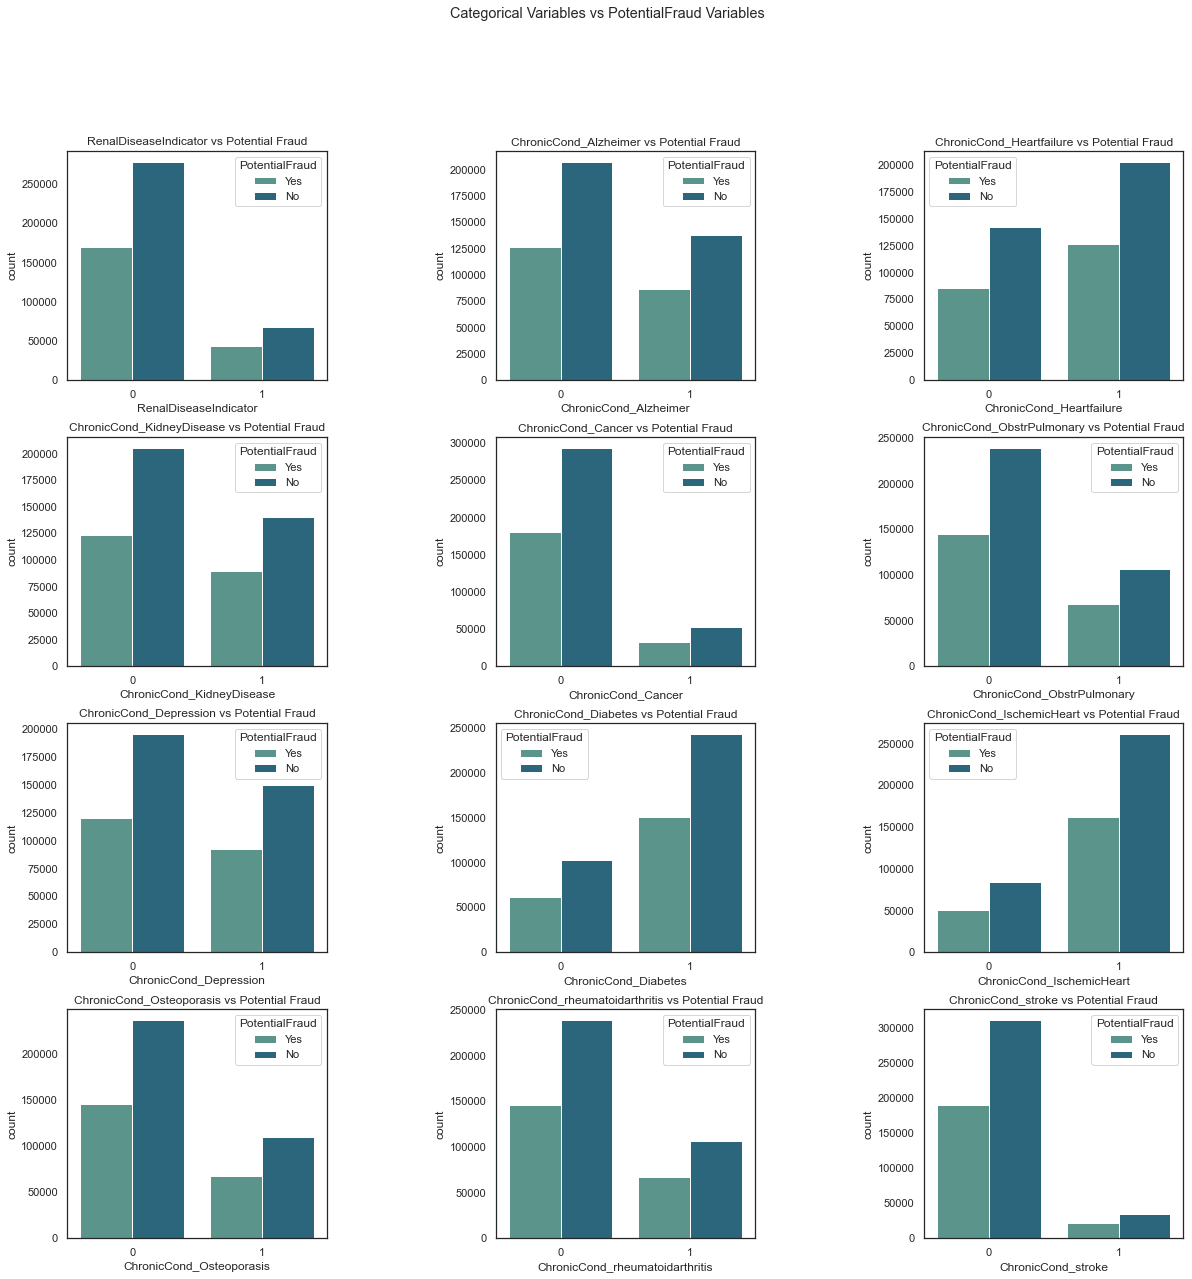

In [203]:
cat_cols= ['RenalDiseaseIndicator','ChronicCond_Alzheimer','ChronicCond_Heartfailure','ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary','ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis','ChronicCond_rheumatoidarthritis','ChronicCond_stroke']
ax=[]

fig= plt.figure(figsize=(20,20))
gs= GridSpec(4,3,figure= fig)
fig.suptitle('Categorical Variables vs PotentialFraud Variables')

for i in range(4):
    for j in range(3):
        ax.append(fig.add_subplot(gs[i,j]))

for k in range(12):
    sns.countplot(x=cat_cols[k],hue='PotentialFraud',data=final_df, palette='crest', ax=ax[k])
    ax[k].set_title('{} vs Potential Fraud'.format(cat_cols[k]))

plt.subplots_adjust(wspace=0.65)
plt.subplots_adjust(hspace=0.25)
#plt.xlabel("NA Percentage in each of the Datasets")
plt.show()

`Observations`
- The above figures compare the distribution of the categorical variables against the number of classes in the Potential Fraud variable

- The figure gives the counts of each of the classes associated to each of the 'Yes' and 'No' classes of the Potential Fruad variable

### `More Feature Engineering`

#### Analysing the claimprocedure

In [204]:
final_df.columns


Index(['Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode',
       'AdmitDays', 'Gender', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumat

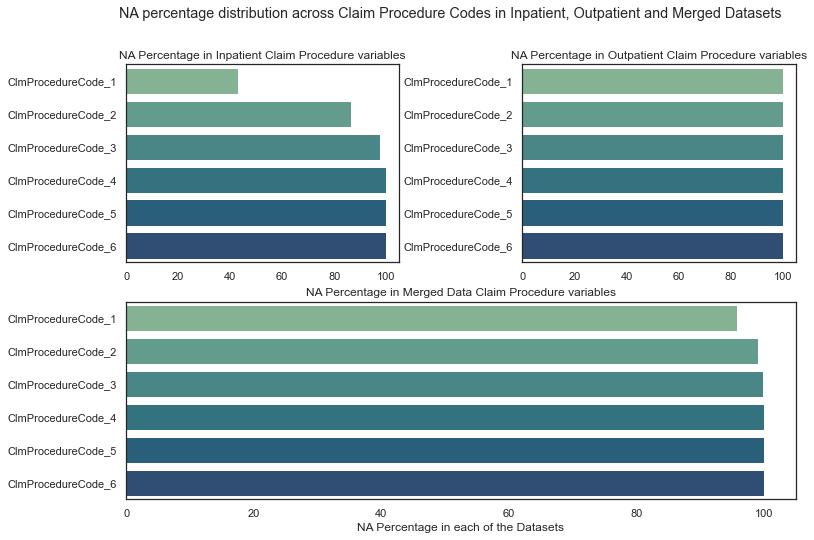

In [205]:
clm_proc= ['ClmProcedureCode_1','ClmProcedureCode_2','ClmProcedureCode_3','ClmProcedureCode_4','ClmProcedureCode_5','ClmProcedureCode_6']
clm_proc_in=[]
clm_proc_out=[]
clm_proc_mer=[]

for i in clm_proc:
    clm_proc_in.append(np.round((Inpatient_data[i].isna().sum()/len(Inpatient_data[i]))*100,2))
    clm_proc_out.append(np.round((Outpatient_data[i].isna().sum()/len(Outpatient_data[i]))*100,2))
    clm_proc_mer.append(np.round((final_df[i].isna().sum()/len(final_df[i]))*100,2))

fig= plt.figure(figsize=(12,8))
gs= GridSpec(2,2,figure= fig)

fig.suptitle('NA percentage distribution across Claim Procedure Codes in Inpatient, Outpatient and Merged Datasets')
ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,:])

sns.barplot(ax=ax1,y= clm_proc,x= clm_proc_in, palette='crest')
sns.barplot(ax=ax2,y= clm_proc,x= clm_proc_out,palette='crest')
sns.barplot(ax=ax3,y= clm_proc,x= clm_proc_mer,palette='crest')

ax1.title.set_text('NA Percentage in Inpatient Claim Procedure variables')
ax2.title.set_text('NA Percentage in Outpatient Claim Procedure variables')
ax3.title.set_text('NA Percentage in Merged Data Claim Procedure variables')

plt.subplots_adjust(wspace=0.45)
plt.xlabel("NA Percentage in each of the Datasets")
plt.show()

`Observations`

- We see that there are 100% NA values in the Outpatient dataset in all of the claim Procedure columns. This is because most of the outpatients do not undergo procedures.

- In case of a need for a complex procedure, the patients are admitted and are treated as inpatients.

- High percenatge of the NA values in the merged datasets is not due to missing data but due to the reason that the size of the Outpatient dataset is much higher than the Inpatient dataset.

- As most of the outptient dataset claim procedure has a high values of NA, they are introducing skewness in the merged dataset.

#### Dropping the claim procedures.


In [206]:
# Dropping the claim procedures
final_df.drop(clm_proc, axis=1, inplace= True)

#### Analysing the claim Diagnosis

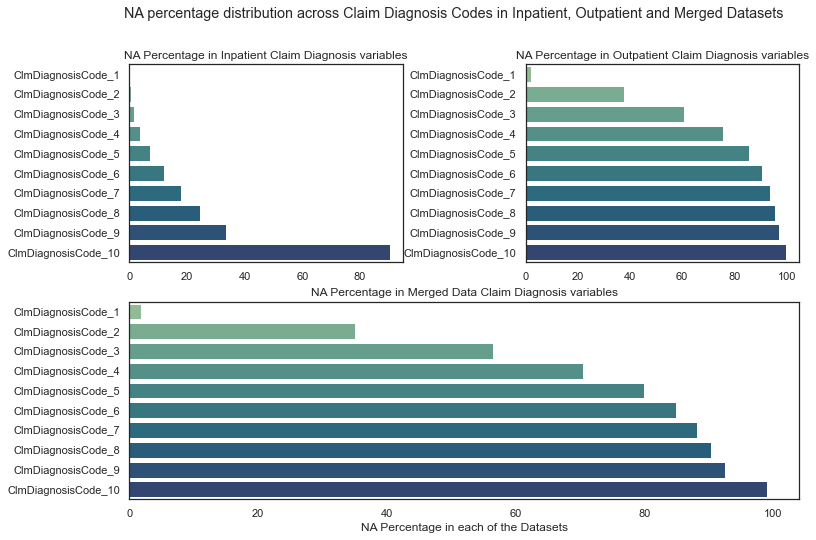

In [207]:
clm_diag= ['ClmDiagnosisCode_1','ClmDiagnosisCode_2','ClmDiagnosisCode_3','ClmDiagnosisCode_4','ClmDiagnosisCode_5','ClmDiagnosisCode_6','ClmDiagnosisCode_7','ClmDiagnosisCode_8','ClmDiagnosisCode_9','ClmDiagnosisCode_10']
clm_diag_nai=[]
clm_diag_nao=[]
clm_diag_na=[]

for i in clm_diag:
    clm_diag_nai.append(np.round((Inpatient_data[i].isna().sum()/len(Inpatient_data[i]))*100,2))
    clm_diag_nao.append(np.round((Outpatient_data[i].isna().sum()/len(Outpatient_data[i]))*100,2))
    clm_diag_na.append(np.round((final_df[i].isna().sum()/len(final_df[i]))*100,2))

fig= plt.figure(figsize=(12,8))
gs= GridSpec(2,2,figure= fig)

fig.suptitle('NA percentage distribution across Claim Diagnosis Codes in Inpatient, Outpatient and Merged Datasets')
ax1= fig.add_subplot(gs[0,0])
ax2= fig.add_subplot(gs[0,1])
ax3= fig.add_subplot(gs[1,:])

sns.barplot(ax=ax1,y= clm_diag,x= clm_diag_nai,palette='crest')
sns.barplot(ax=ax2,y= clm_diag,x= clm_diag_nao,palette='crest')
sns.barplot(ax=ax3,y= clm_diag,x= clm_diag_na,palette='crest')

ax1.title.set_text('NA Percentage in Inpatient Claim Diagnosis variables')
ax2.title.set_text('NA Percentage in Outpatient Claim Diagnosis variables')
ax3.title.set_text('NA Percentage in Merged Data Claim Diagnosis variables')

plt.subplots_adjust(wspace=0.45)
plt.xlabel("NA Percentage in each of the Datasets")
plt.show()

`Observations`

- Very similar observations as the Claims Procedure variable. Even in this case the reasons for the NA values are similar as in the case of ClaimsProcedures variable

#### Dropping the Claim Diagnosis 

In [208]:
final_df.drop(clm_diag, axis=1, inplace= True)

In [209]:
final_df.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'AdmitDays', 'Gender',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'WhetherDead', 'PotentialFraud', 'inp_out', 'Total_deductible',
       'Total_reimbursible', 'settlement_days'],
      dtype='object')

In [210]:
# Missing values in final_df
final_df.isna().sum()

Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443743
OtherPhysician                     358445
DeductibleAmtPaid                     898
ClmAdmitDiagnosisCode              412297
DiagnosisGroupCode                 517708
AdmitDays                               0
Gender                                  0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis          

#### Looking at the distribution of the NA values in the Operating physician and Other physician columns of the Inpatients and the Outpatients datasets

In [212]:
def plot_physician_na_percentage(inpat, outpat):
    # Calculate NA percentages for Inpatient Data
    in_opr_p = np.round((inpat['OperatingPhysician'].isna().sum() / len(inpat['OperatingPhysician'])) * 100, 2)
    in_ot_p = np.round((inpat['OtherPhysician'].isna().sum() / len(inpat['OtherPhysician'])) * 100, 2)

    print("NA percent in OperatingPhysician col in Inpatient Data:", in_opr_p)
    print("NA percent in OtherPhysician col in Inpatient Data:", in_ot_p)
    print("*" * 100)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=["OperatingPhysician", "OtherPhysician"], y=[in_opr_p, in_ot_p], palette='crest')
    plt.xlabel("Physician Type")
    plt.ylabel("Percentage of NA values")
    plt.title("NA value Percentage in OperatingPhysician and OtherPhysician in Inpatients")
    plt.show()

    # Calculate NA percentages for Outpatient Data
    out_opr_p = np.round((outpat['OperatingPhysician'].isna().sum() / len(outpat['OperatingPhysician'])) * 100, 2)
    out_ot_p = np.round((outpat['OtherPhysician'].isna().sum() / len(outpat['OtherPhysician'])) * 100, 2)

    print("NA percent in OperatingPhysician col in Inpatient Data:", out_opr_p)
    print("NA percent in OtherPhysician col in Inpatient Data:", out_ot_p)
    print("*" * 100)

    plt.figure(figsize=(8, 6))
    sns.barplot(x=["OperatingPhysician", "OtherPhysician"], y=[out_opr_p, out_ot_p], palette='crest')
    plt.xlabel("Physician Type")
    plt.ylabel("Percentage of NA values")
    plt.title("NA value Percentage in OperatingPhysician and OtherPhysician in Outpatients")
    plt.show()

NA percent in OperatingPhysician col in Inpatient Data: 41.12
NA percent in OtherPhysician col in Inpatient Data: 88.41
****************************************************************************************************


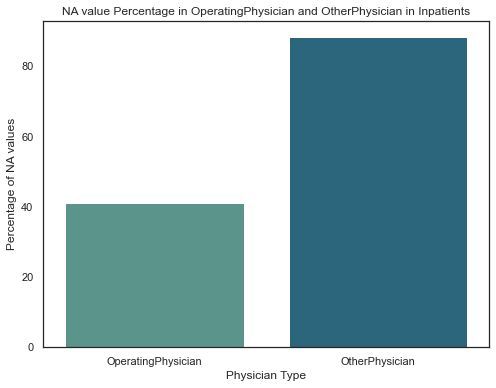

NA percent in OperatingPhysician col in Inpatient Data: 82.5
NA percent in OtherPhysician col in Inpatient Data: 62.33
****************************************************************************************************


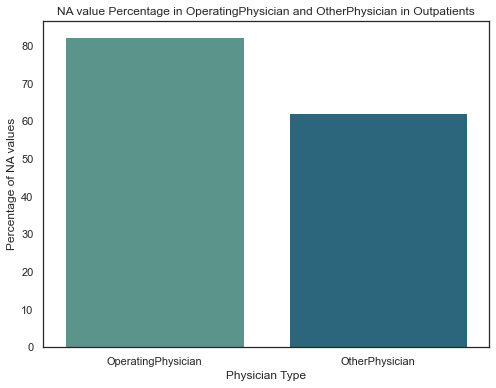

In [213]:
plot_physician_na_percentage(Inpatient_data, Outpatient_data)

`Observations:`
`
1. The above graphs are inline with the reality or practical situtation. NA values in Operating Physician and Other Physician datasets doesnt mean that the data is missing.

2. As per my secondary research, Operating Physicians are involved in cases where a surgery or other complications are involved

3. OtherPhysicians are involved in cases where the patient has co-morbidities

`Observations on Inpatient Dataset:`

1. We have 41% NA values in Operating Physicians column. This means the 59% of the Inpatients likely needed a surgery or had other complication where as 41% didnt have any complications or didnt need surgery
2. We have 88% NA values in Other Physicians column. This means the 12% of the Inpatients had co-morbidities where as 12% didnt have co-morbidities

`Observations on Outpatient Dataset:`

1. We have 82% NA values in Operating Physicians column. Outpatients do not usually go through surgeries or other complicated procedures in a day
2. We have 62% NA values in Other Physicians column.Outpatients do not usually consult other physicians very often.

In [217]:
final_df.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'AdmitDays', 'Gender',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'WhetherDead', 'PotentialFraud', 'inp_out', 'Total_deductible',
       'Total_reimbursible', 'settlement_days', 'Physicians',
       'IsDeductibleAmtPaid'],
      dtype='object')

#### Attending physician

Imputing the Attending Physician with Mode or MostFrequent strategy using SimpleImpute

In [214]:
final_df[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']] = np.where(final_df[['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician']].isnull(), 0, 1)

final_df['Physicians'] = final_df['AttendingPhysician'] + final_df['OperatingPhysician'] + final_df['OtherPhysician']


In [215]:
final_df['Physicians'].isna().sum()

0

In [216]:
final_df['DeductibleAmtPaid'].fillna(0,inplace=True)

final_df['IsDeductibleAmtPaid']=np.where(final_df['DeductibleAmtPaid']==0,0,1) 


final_df['IsDeductibleAmtPaid'].value_counts()

0    497577
1     60594
Name: IsDeductibleAmtPaid, dtype: int64

In [219]:
final_df.columns

Index(['Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'AdmitDays', 'Gender',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'WhetherDead', 'PotentialFraud', 'inp_out', 'Total_deductible',
       'Total_reimbursible', 'settlement_days', 'Physicians',
       'IsDeductibleAmtPaid'],
      dtype='object')

In [218]:
final_df.isna().sum()

Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                      0
OperatingPhysician                      0
OtherPhysician                          0
DeductibleAmtPaid                       0
ClmAdmitDiagnosisCode              412297
DiagnosisGroupCode                 517708
AdmitDays                               0
Gender                                  0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis          

## `Grouping  for pattern recognition`
PROVIDER + GENDER + CONDITION + PHYSICIAN + INP/OUT + STATE + COUNTY + NUMERICAL FEATURES


In [220]:
final_data = final_df.groupby(['Provider'], as_index = False)['Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
       'OperatingPhysician', 'OtherPhysician', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'DiagnosisGroupCode', 'AdmitDays', 'Gender',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age',
       'WhetherDead', 'PotentialFraud', 'inp_out', 'Total_deductible',
       'Total_reimbursible', 'settlement_days', 'Physicians',
       'IsDeductibleAmtPaid']

C:\Users\User\AppData\Local\Temp\ipykernel_10668\716484735.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  final_data = final_df.groupby(['Provider'], as_index = False)['Provider', 'InscClaimAmtReimbursed', 'AttendingPhysician',
